#Mount Data

In [ ]:
# GET the data
## Mounting path dari Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# GET the data
## Memuat Data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Deep Learning/Data/sentiment/capres/Capres2014-1.1.csv", usecols=["Isi_Tweet", "Sentimen"])

In [ ]:
# EXPLORE the data
## Menampilkan lima data terakhir
dataset

,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",-1
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,-1
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",-1
...,...,...
1880,Jangan kabur dari tanggung jawab dengan kemasa...,1
1881,@echo_hadiwibowo mana berani pmrntah..m G da y...,1
1882,@IndonesiaCapres ANAK MEDAN DUKUNG CAPRES JK D...,1
1883,"RT @idoidonajib: Jelek! ""@fallenokta: Apa komp...",1


In [ ]:
## Mengecek Imbalanced Data
dataset['Sentimen'].value_counts()

 1    1117
-1     768
Name: Sentimen, dtype: int64

In [ ]:
bool_series = dataset.duplicated(subset='Isi_Tweet')

print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after removing duplicates found in the Name column:')
dataset = dataset[~bool_series]
dataset

Boolean series:
0       False
1       False
2       False
3       False
4       False
        ...  
1880    False
1881    False
1882    False
1883    False
1884    False
Length: 1885, dtype: bool


DataFrame after removing duplicates found in the Name column:


,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",-1
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,-1
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",-1
...,...,...
1880,Jangan kabur dari tanggung jawab dengan kemasa...,1
1881,@echo_hadiwibowo mana berani pmrntah..m G da y...,1
1882,@IndonesiaCapres ANAK MEDAN DUKUNG CAPRES JK D...,1
1883,"RT @idoidonajib: Jelek! ""@fallenokta: Apa komp...",1


#Zul punya

In [ ]:
data1 = dataset[dataset['Sentimen']==1]
data2 = dataset[dataset['Sentimen']==-1]
data1_ = data1.sample(data2.shape[0])
dataset = pd.concat([data1_, data2])
dataset = dataset.sample(frac = 1)
dataset.reset_index(inplace = True)
dataset.drop(["index"], axis = 1, inplace = True)

dataset.head(10)

,Isi_Tweet,Sentimen
0,Ora usah gemagusan jadi #capres . #ARB banyak ...,-1
1,Saat emak gue bicara politik. Kalo Hatta Rajas...,-1
2,RT @betynurbaety: Padahal belum tentu pada jad...,-1
3,Bicara PKB msalnya. Skrg si partai sibuk usung...,1
4,Iklan djarum versi ibu lebih mengena dibanding...,-1
5,Iklan Capres Wiranto di RCTI keliatan banget b...,-1
6,Dukungan Capres Wiranto-Harry Tanu.,1
7,skemanya bisa begini: Capres Prabowo cawapresn...,1
8,"RT @fadjroeL: Bungkus ""@Nurcholis10: Capres @j...",1
9,"Love it! RT""@PekanbaruCo: Jika Jadi Presiden, ...",1


In [ ]:
data1 = dataset[dataset['Sentimen']==1]
data2 = dataset[dataset['Sentimen']==-1]
data2_ = pd.concat([data2.iloc[0:318], data2])
dataset = pd.concat([data1, data2_])
dataset = dataset.sample(frac = 1)
dataset.reset_index(inplace = True)
dataset.drop(["index"], axis = 1, inplace = True)

dataset

,Isi_Tweet,Sentimen
0,Merananya Nasib Korban Lumpur Lapindo saat Ber...,-1
1,RT @gm_gm: Alhamdulilah. Orang sibuk kepingin ...,-1
2,saya tidak rela klo skarang jokowi dicalonkn j...,-1
3,RT @bayuworo: @liputan6dotcom kl PDIP masih ny...,-1
4,"Apa beliau g punya kerjaan, punya akun segini ...",-1
...,...,...
1909,Kampanye utk dirinya sendiri ..munafik? Aji mu...,-1
1910,RT @koeztri: @alankomar_ @tutihand_ emang ada ...,-1
1911,"Jelek! ""@fallenokta: Apa komposisi ini udah ba...",-1
1912,Bhuahaha RT @kalamanaya: Capres Hatta R. cawap...,-1


In [ ]:
dataset['Sentimen'].value_counts()

 1    957
-1    639
Name: Sentimen, dtype: int64

In [ ]:
## Mengganti {-1,1} menjadi {0,1}
dataset['Sentimen'] = dataset['Sentimen'].replace(-1,0)
dataset.head()

<ipython-input-7-6f6a22d310d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sentimen'] = dataset['Sentimen'].replace(-1,0)


,Isi_Tweet,Sentimen
0,"Biusnya habis ! RT""@eddies_song: Dahlan Iskan ...",0
1,"Presiden Prabowo ,Presiden Terakhir Indonesia",1
2,@republikaonline masa capres prabowo bergitu b...,0
3,"Kalo kata bapak capres ARB, kita harus ""berani...",1
4,"RT @DhafaRizky_: Najis,org gila doang yg dukun...",0


In [ ]:
# MODEL the data
## Pra Pengolahan - Cleaning
import numpy as np
import re
import string

def clean_text(tweet):
    
    # Convert to lower case
    tweet = tweet.lower()
    # remove unicode characters
    tweet = tweet.encode('ascii', 'ignore').decode()
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub("\\W"," ",tweet) 
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('\,', ' ', tweet)
    tweet = re.sub('\)', ' ', tweet)
    tweet = re.sub('\:', ' ', tweet)
    tweet = re.sub('\-', ' ', tweet)
    tweet = re.sub('\!', ' ', tweet)
    tweet = re.sub('\"', ' ', tweet)
    tweet = re.sub('\.', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    
    return tweet

dataset["Isi_Tweet"] = dataset['Isi_Tweet'].map(lambda x: clean_text(x))
dataset = dataset[dataset['Isi_Tweet'].apply(lambda x: len(x.split()) >=1)]
dataset.shape

<ipython-input-8-cafb5d8ef6ba>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Isi_Tweet"] = dataset['Isi_Tweet'].map(lambda x: clean_text(x))


(1596, 2)

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.1 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def wordopt(text):
    text = re.sub(' tersebut ', '', text)
    text = re.sub(' gak ', ' tidak ', text)
    text = re.sub(' tdk ', ' tidak ', text)
    text = re.sub(' tak ', ' tidak ', text)
    text = re.sub(' ga ', ' tidak ', text)
    text = re.sub(' gk ', ' tidak ', text)
    text = re.sub(' tidak ', ' ', text)
    text = re.sub('yg ', 'yang ', text)
    text = re.sub(' yang ', ' ', text)
    text = re.sub(' tp ', ' tapi ', text)
    text = re.sub(' jdi ', ' jadi ', text)
    text = re.sub(' jd ', ' jadi ', text)
    text = re.sub(' jadi ', ' ', text)
    text = re.sub(' org ', ' orang ', text)
    text = re.sub(' hehe ', ' ', text)
    text = re.sub(' hehehe ', ' ', text)
    text = re.sub(' wakakak ', ' ', text)
    text = re.sub(' jls ', ' jelas ', text)
    text = re.sub(' sdh ', ' sudah ', text)
    text = re.sub(' trus ', ' terus ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' wapres ', ' cawapres ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' sy ', ' saya ', text)
    text = re.sub(' aku ', ' saya ', text)
    text = re.sub(' gue ', ' saya ', text)
    text = re.sub(' blm ', ' belum ', text)
    text = re.sub('klo ', ' kalau ', text)
    text = re.sub('kalo ', ' kalau ', text)
    text = re.sub(' kalau ', ' ', text)
    text = re.sub(' calon presiden ', ' capres ', text)
    text = re.sub(' mega ', ' megawati ', text)
    text = re.sub(' jkt ', ' jakarta ', text)
    text = re.sub(' deh ', ' ', text)
    text = re.sub('2013', '', text)
    text = re.sub(' rt ', ' ', text)
    text = re.sub(' wakilnya ', ' wakil ', text)
    text = re.sub(' lg ', ' ', text)
    text = re.sub(' gt ', ' ', text)
    text = re.sub(' ahhh ', ' ', text)
    text = re.sub(' cm ', ' ', text)
    text = re.sub(' dr ', ' ', text)
    text = re.sub(' kan ', ' ', text)
    text = re.sub(' ibu ', ' ', text)
    text = re.sub(' akn ', ' akan ', text)
    text = re.sub(' nih ', ' ', text)
    text = re.sub(' jg ', ' ', text)
    text = re.sub(' cawapresnya ', ' cawapres ', text)
    text = re.sub(' pak ', ' ', text)
    text = re.sub(' d ', ' ', text)
    text = re.sub(' p ', ' ', text)
    text = re.sub('rt ', ' ', text)
    text = re.sub(' bu ', ' ', text)
    text = re.sub(' b ', ' ', text)
    text = re.sub(' jgn ', ' ', text)
    text = re.sub(' sbg ', ' ', text)
    text = re.sub(' pd ', ' ', text)
    text = re.sub(' pa ', ' ', text)
    text = re.sub(' pas ', ' ', text)
    text = re.sub(' b ', ' ', text)
    text = re.sub(' kok ', ' ', text)
    text = re.sub(' masa ', ' ', text)
    text = re.sub(' om ', ' ', text)
    text = re.sub(' siapa ', ' ', text)
    text = re.sub(' ada ', ' ', text)
    text = re.sub(' gub ', ' gubernur ', text)
    text = re.sub(' apa ', ' ', text)
    text = re.sub(' aja ', ' ', text)
    text = re.sub(' joko widodo ', ' jokowi ', text)
    text = re.sub('tuit', ' ', text)
    text = re.sub(' nya ', ' ', text)
    text = re.sub(' jusuf kalla ', ' jk ', text)
    text = re.sub(' dong ', ' ', text)
    text = re.sub(' cuma ', ' ', text)
    text = re.sub(' dgn ', ' ', text)
    text = re.sub(' dg ', ' ', text)

    return text

dataset["Isi_Tweet"] = dataset["Isi_Tweet"].apply(wordopt)
dataset["Isi_Tweet"] = dataset["Isi_Tweet"].apply(stopword.remove)
dataset.head(15)

,Isi_Tweet,Sentimen
0,biusnya habis dahlan iskan semakin jelas capre...,0
1,presiden prabowo presiden terakhir indonesia,1
2,capres prabowo bergitu bodoh ngecap uang ngak...,0
3,kata bapak capres arb harus berani berfikir b...,1
4,najis orang gila doang dukung presiden jokowi...,0
5,jakarta rakernas pan bahas pencalonan presid...,0
6,nyata anaknya cantik capres wiranto kayaknya m...,1
7,waktu kolonel pramono edhie ajudan presiden m...,0
8,sirik aneh pigur capres wiranto ht ngurusi no...,0
9,bapak maju capres teruslah suatu tiba sekali ...,1


In [ ]:
data1 = dataset[dataset['Sentimen']==1]
data1

,Isi_Tweet,Sentimen,jokowi
1,presiden prabowo presiden terakhir indonesia,1,False
3,kata bapak capres arb harus berani berfikir b...,1,False
6,nyata anaknya cantik capres wiranto kayaknya m...,1,False
9,bapak maju capres teruslah suatu tiba sekali ...,1,False
10,capres jokowi wacapres abraham samad gubernur...,1,True
...,...,...,...
1880,jangan kabur tanggung jawab kemasan mencalonka...,1,True
1881,mana berani pmrntah m g da arepin dh ganti p...,1,False
1882,anak medan dukung capres jk md ckp putaran,1,False
1883,jelek komposisi udah bagus prabowo presiden j...,1,True


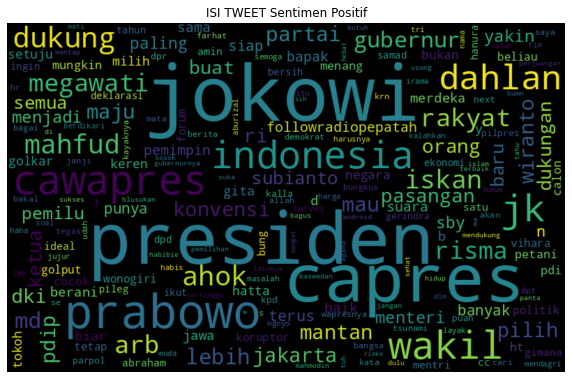

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_word = ' '.join(data1["Isi_Tweet"])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("ISI TWEET Sentimen Positif")
plt.show()

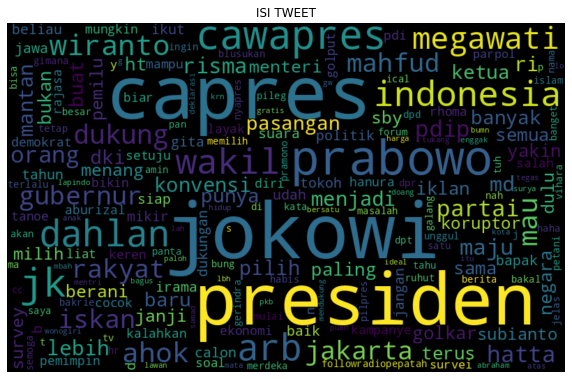

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_word = ' '.join(dataset["Isi_Tweet"])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("ISI TWEET")
plt.show()

In [ ]:
x = dataset['Isi_Tweet']
y = dataset['Sentimen']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
vectorization = TfidfVectorizer()
xt = vectorization.fit_transform(x)
xt

<1596x3937 sparse matrix of type '<class 'numpy.float64'>'
	with 16714 stored elements in Compressed Sparse Row format>

In [ ]:
smote = SMOTETomek()

# implementasi oversampling
x_sm, y_sm = smote.fit_resample(xt, y)

y_sm.value_counts()

0    952
1    952
Name: Sentimen, dtype: int64

In [ ]:
## Pra Pengolahan - Splitting
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.2)
train_data, test_data, train_labels, test_labels = train_test_split(dataset['Isi_Tweet'], dataset['Sentimen'], test_size=0.01*11)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
L = []
for i in range(10,50):
  x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.01*i)
  RFC = RandomForestClassifier(criterion = 'gini')
  RFC.fit(x_train, y_train)
  L.append(RFC.score(x_test, y_test))
K = max(L)
for j in range(0,40):
  if K == L[j]:
    print(j)
print(K)

2
0.859375


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.01*12)

In [ ]:
RFC = RandomForestClassifier(criterion = 'gini')
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = RFC.predict(x_test)
pred_rfc

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
RFC.score(x_test, y_test)

0.8177083333333334

In [ ]:
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import Callback


class LRFinder(Callback):

            lr_finder = LRFinder(min_lr=1e-5, 
                                 max_lr=1e-2, 
                                 steps_per_epoch=np.ceil(epoch_size/batch_size), 
                                 epochs=3)
            model.fit(x_train, y_train, callbacks=)
            
            lr_finder.plot_loss()

    def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
        super().__init__()
        
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_iterations = steps_per_epoch * epochs
        self.iteration = 0
        self.history = {}
        
    def clr(self):
        '''Calculate the learning rate.'''
        x = self.iteration / self.total_iterations 
        return self.min_lr + (self.max_lr-self.min_lr) * x
        
    def on_train_begin(self, logs=None):
        '''Initialize the learning rate to the minimum value at the start of training.'''
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.min_lr)
        
    def on_batch_end(self, epoch, logs=None):
        '''Record previous batch statistics and update the learning rate.'''
        logs = logs or {}
        self.iteration += 1

        self.history.setdefault('lr', 
).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', 
).append(self.iteration)

        for k, v in logs.items():
            self.history.setdefault(k, 
).append(v)
            
        K.set_value(self.model.optimizer.lr, self.clr())
 
    def plot_lr(self):
        '''Helper function to quickly inspect the learning rate schedule.'''
        plt.plot(self.history['iterations'], self.history['lr'])
        plt.yscale('log')
        plt.xlabel('Iteration')
        plt.ylabel('Learning rate')
        plt.show()
        
    def plot_loss(self):
        '''Helper function to quickly observe the learning rate experiment results.'''
        plt.plot(self.history['lr'], self.history['loss'])
        plt.xscale('log')
        plt.xlabel('Learning rate')
        plt.ylabel('Loss')
        plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion = 'gini')
RFC.fit(x_train, y_train)

NameError: ignored

In [ ]:
RFC.score(x_test, y_test)

0.8590078328981723

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 66.3 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
import IPython

bert_tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
def tokenisasi(teks):
    encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 32, 
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

    tokenID = encode_dict['input_ids']
    attention_mask = encode_dict['attention_mask']

    return tokenID, attention_mask

def create_input(data):
    tokenID, input_mask = [], []
    for teks in data:
        token, mask = tokenisasi(teks)
        tokenID.append(token)
        input_mask.append(mask)
    
    return [np.asarray(tokenID, dtype=np.int32).reshape(-1, 32), 
            np.asarray(input_mask, dtype=np.int32).reshape(-1,32)]

bert_model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2", trainable=False)
def bert(hp):
    
    #Input layer
    input_token = keras.layers.Input(shape=(32,), dtype=np.int32,
                                    name="input_token")
    input_mask = keras.layers.Input(shape=(32,), dtype=np.int32,
                                   name="input_mask")

    #Embedding
    bert_embedding = bert_model([input_token, input_mask])[0]

    #Output layer
    output = keras.layers.Dense(1, activation='sigmoid',
                                kernel_regularizer=keras.regularizers.l2(hp.Choice('kernel_dense', values = [0.01, 0.001])))(bert_embedding)
    
    model = keras.models.Model(inputs=[input_token, input_mask], outputs=output)

    model.compile(optimizer = keras.optimizers.Adam(2e-5),
                  loss ='binary_crossentropy',
                  metrics=['accuracy'])
   
    return model

class ClearTrainingOutput(keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00


In [ ]:
from keras_tuner.tuners import BayesianOptimization

bert_train_data = create_input(train_data)
bert_test_data = create_input(test_data)


tuner = BayesianOptimization(bert,
                             objective = 'val_accuracy', 
                             max_trials = 1,
                             directory = '/content/Hasil',
                             project_name = 'Sentiment-BERT',
                             overwrite = True)

tuner.search(bert_train_data, train_labels,
             batch_size=1, epochs=10,
             validation_data=(bert_test_data, test_labels),
             callbacks=[early_stop, ClearTrainingOutput()])

#best_hps = tuner.get_best_hyperparameters()[0]
#model = tuner.hypermodel.build(best_hps)
# Mendapatkan model terbaik
model = tuner.get_best_models()[0]

Trial 1 Complete [00h 46m 00s]
val_accuracy: 0.6780213117599487

Best val_accuracy So Far: 0.6780213117599487
Total elapsed time: 00h 46m 00s


In [ ]:
test_loss, test_acc = model.evaluate(bert_test_data, test_labels)
print('Test accuracy:', test_acc)

10/10 [==============================] - 171s 16s/step - loss: 0.4672 - accuracy: 0.7985
Test accuracy: 0.7984983921051025


In [ ]:
model.save('Data/model_mlp_sentiment.h5')

#model = keras.models.load_model('Data/model_mlp_sentiment.h5')

#Richard punya

JANGAN DIUBAH - UBAH YA GAES

---



In [ ]:
data1 = dataset[dataset['Sentimen']==1]
data2 = dataset[dataset['Sentimen']==-1]
data1_ = data1.sample(data2.shape[0])
dataset = pd.concat([data1_, data2])
dataset = dataset.sample(frac = 1)
dataset.reset_index(inplace = True)
dataset.drop(["index"], axis = 1, inplace = True)

dataset.head(10)

,Isi_Tweet,Sentimen
0,"RT @soewito_y: Haha...jancuk tenan""@fadjroeL: ...",1
1,"Jokowi nyapres 2014 OK, tp klo 2019 Hebat. Klo...",1
2,@mach_idin @SBYudhoyono persamaannya beliau be...,-1
3,RT @AffanVegatech: Prabowo tidak ngoyo jadi pr...,1
4,RT @Fakhmuda: Presiden @jokowi_do2 wakil @anie...,1
5,RT @ferlaks: Spertinya sy sudah pilihan calon ...,1
6,"RT @harrypvdio: Ndak mau mikir, ndak mau mikir...",-1
7,Listrik TETEP byar pet! @despar54: 4 Program C...,-1
8,"#TuitMedan Wartawan Bule Tanya soal Capres, Jo...",-1
9,@jokowi_do2 @Jokowi_RI @Jokowi2014 @Jokowi_Pre...,1


In [ ]:
dataset['Sentimen'].value_counts()

 1    639
-1    639
Name: Sentimen, dtype: int64

In [ ]:
## Mengganti {-1,1} menjadi {0,1}
dataset['Sentimen'] = dataset['Sentimen'].replace(-1,0)
dataset.head()

,Isi_Tweet,Sentimen
0,"RT @soewito_y: Haha...jancuk tenan""@fadjroeL: ...",1
1,"Jokowi nyapres 2014 OK, tp klo 2019 Hebat. Klo...",1
2,@mach_idin @SBYudhoyono persamaannya beliau be...,0
3,RT @AffanVegatech: Prabowo tidak ngoyo jadi pr...,1
4,RT @Fakhmuda: Presiden @jokowi_do2 wakil @anie...,1


In [ ]:
# MODEL the data
## Pra Pengolahan - Cleaning
import numpy as np
import re

def clean_text(tweet):
    
    # Convert to lower case
    tweet = tweet.lower()
    # remove unicode characters
    tweet = tweet.encode('ascii', 'ignore').decode()
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('\,', ' ', tweet)
    tweet = re.sub('\)', ' ', tweet)
    tweet = re.sub('\:', ' ', tweet)
    tweet = re.sub('\-', ' ', tweet)
    tweet = re.sub('\!', ' ', tweet)
    tweet = re.sub('\"', ' ', tweet)
    tweet = re.sub('\.', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    
    return tweet

dataset["Isi_Tweet"] = dataset['Isi_Tweet'].map(lambda x: clean_text(x))
dataset = dataset[dataset['Isi_Tweet'].apply(lambda x: len(x.split()) >=1)]
dataset.shape

(1278, 2)

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopword = factory.get_stop_words()

In [ ]:
def wordopt(text):
    text = re.sub(' tersebut ', '', text)
    text = re.sub(' gak ', ' tidak ', text)
    text = re.sub(' tdk ', ' tidak ', text)
    text = re.sub(' tak ', ' tidak ', text)
    text = re.sub(' ga ', ' tidak ', text)
    text = re.sub(' tidak ', ' ', text)
    text = re.sub(' yg ', ' yang ', text)
    text = re.sub(' tp ', ' tapi ', text)
    text = re.sub(' jdi ', ' jadi ', text)
    text = re.sub(' jd ', ' jadi ', text)
    text = re.sub(' jadi ', ' ', text)
    text = re.sub(' org ', ' orang ', text)
    text = re.sub(' hehe ', ' ', text)
    text = re.sub(' jls ', ' jelas ', text)
    text = re.sub(' sdh ', ' sudah ', text)
    text = re.sub(' trus ', ' terus ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' wapres ', ' cawapres ', text)
    text = re.sub(' utk ', ' untuk ', text)
    text = re.sub(' sy ', ' saya ', text)
    text = re.sub(' aku ', ' saya ', text)
    text = re.sub(' gue ', ' saya ', text)
    text = re.sub(' blm ', ' belum ', text)
    text = re.sub(' klo ', ' jika ', text)
    text = re.sub(' calon presiden ', ' capres ', text)
    text = re.sub(' mega ', ' megawati ', text)
    text = re.sub(' jkt ', ' jakarta ', text)
    text = re.sub(' deh ', ' ', text)
    text = re.sub('2013', '', text)

    return text

dataset["Isi_Tweet"] = dataset["Isi_Tweet"].apply(wordopt)
#dataset["Isi_Tweet"] = dataset["Isi_Tweet"].apply(stopword.remove)
dataset.head(15)

,Isi_Tweet,Sentimen
0,rt haha jancuk tenan hehehe keren rt capres...,1
1,jokowi nyapres 2014 ok tapi jika 2019 hebat ...,1
2,persamaannya beliau berdua ditakdirkan menjad...,0
3,rt prabowo ngoyo presiden prabowo hanya ingin...,1
4,rt presiden wakil mentri agama komarudin men...,1
5,rt spertinya saya sudah pilihan capres saya na...,1
6,rt ndak mau mikir ndak mau mikir ndak mau mi...,0
7,listrik tetep byar pet 4 program capres dahla...,0
8,tuitmedan wartawan bule tanya soal capres jok...,0
9,jokowi siapa lg yang mau gabung untuk tim suk...,1


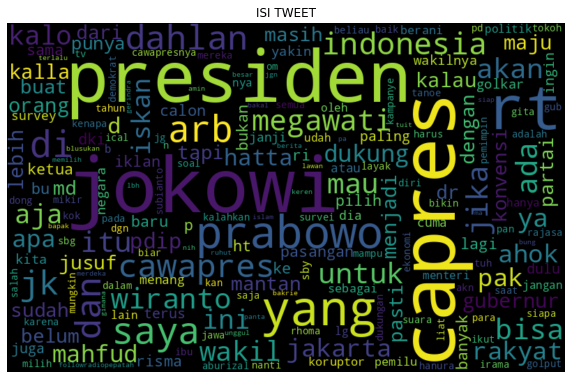

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_word = ' '.join(dataset["Isi_Tweet"])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(all_word)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("ISI TWEET")
plt.show()

In [ ]:
x = dataset['Isi_Tweet']
y = dataset['Sentimen']

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

over = SMOTE(sampling_strategy=0.01)
under = RandomUnderSampler(sampling_strategy=1)
pipeline = make_pipeline(over,under)

vectorization = TfidfVectorizer()
xt = vectorization.fit_transform(x)


In [ ]:
#x_sm,y_sm = pipeline.fit_resample(xt,y)

ValueError: ignored

In [ ]:
over = S
smote = SMOTETomek(1)
# implementasi oversampling
x_sm, y_sm = smote.fit_resample(xt, y)

y_sm.value_counts()

NameError: ignored

In [ ]:
## Pra Pengolahan - Splitting
from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2)
train_data, test_data, train_labels, test_labels = train_test_split(dataset['Isi_Tweet'], dataset['Sentimen'], test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion = 'gini')
RFC.fit(xt, y)

RandomForestClassifier()

In [ ]:
RFC.score(xt,y)

1.0

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.2 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from transformers import AutoTokenizer, TFAutoModel
import IPython

bert_tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
def tokenisasi(teks):
    encode_dict = bert_tokenizer(teks,
                                   add_special_tokens = True,
                                   max_length = 128, 
                                   padding = 'max_length',
                                   truncation = True,
                                   return_attention_mask = True,
                                   return_tensors = 'tf',)

    tokenID = encode_dict['input_ids']
    attention_mask = encode_dict['attention_mask']

    return tokenID, attention_mask

def create_input(data):
    tokenID, input_mask = [], []
    for teks in data:
        token, mask = tokenisasi(teks)
        tokenID.append(token)
        input_mask.append(mask)
    
    return [np.asarray(tokenID, dtype=np.int32).reshape(-1, 128), 
            np.asarray(input_mask, dtype=np.int32).reshape(-1, 128)]

bert_model = TFAutoModel.from_pretrained("indobenchmark/indobert-base-p2", trainable=False)
def bert(hp):
    
    #Input layer
    input_token = keras.layers.Input(shape=(128,), dtype=np.int32,
                                        name="input_token")
    input_mask = keras.layers.Input(shape=(128,), dtype=np.int32,
                                   name="input_mask")

    #Embedding
    bert_embedding = bert_model([input_token, input_mask])[0]

    #Output layer
    output = keras.layers.Dense(1, activation='sigmoid',
                                kernel_regularizer=keras.regularizers.l2(hp.Choice('kernel_dense', values = [0.01, 0.001])))(bert_embedding)
    
    model = keras.models.Model(inputs=[input_token, input_mask], outputs=output)

    model.compile(optimizer = keras.optimizers.Adam(1e-3),
                  loss ='binary_crossentropy',
                  metrics=['accuracy'])
   
    return model

class ClearTrainingOutput(keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Some layers from the model checkpoint at indobenchmark/indobert-base-p2 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-base-p2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00


In [ ]:
from keras_tuner.tuners import BayesianOptimization

bert_train_data = create_input(train_data)
bert_test_data = create_input(test_data)


tuner = BayesianOptimization(bert,
                             objective = 'val_accuracy', 
                             max_trials = 1,
                             directory = '/content/Hasil',
                             project_name = 'Sentiment-BERT',
                             overwrite = True)

tuner.search(bert_train_data, train_labels,
             batch_size=1, epochs=10,
             validation_data=(bert_test_data, test_labels),
             callbacks=[early_stop, ClearTrainingOutput()])

#best_hps = tuner.get_best_hyperparameters()[0]
#model = tuner.hypermodel.build(best_hps)
# Mendapatkan model terbaik
model = tuner.get_best_models()[0]

Trial 2 Complete [00h 49m 32s]
val_accuracy: 0.705291748046875

Best val_accuracy So Far: 0.705291748046875
Total elapsed time: 01h 41m 08s


In [ ]:
test_loss, test_acc = model.evaluate(bert_test_data, test_labels)
print('Test accuracy:', test_acc)

#Ichsan punya

#Habil punya